In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Margine di guadagno e margine di fase

Nell'esempio seguente, esamineremo la definizione e il calcolo dei margini di guadagno e di fase e la loro relazione con il criterio di stabilità di Bode.
<br> Definiamo la prima occorrenza della curva del diagramma della fase che passa per $\pm180°$ come punto di crossover della fase e la prima occorrenza della curva del diagramma del modulo che passa per $0$ dB come punto di crossover del guadagno. Il margine di guadagno è il valore di grandezza nel punto di crossover di fase (cf) con un segno negativo e il margine di fase è la differenza da $\pm180°$ al punto di crossover di guadagno (cg). Se calcolati su un sistema ad anello aperto, questi valori esprimono la vicinanza del sistema chiuso in retroazione con feedback negativo all'instabilità.

$$\Phi_m=\angle G(j\omega_{cg})-(-180°)\qquad A_m = -|G(j\omega_{cf})|$$

Sulla base di questi valori, è possibile determinare la stabilità di un sistema in feedback negativo: se il margine di guadagno del sistema a circuito aperto è maggiore a $0$ dB, il sistema è stabile (criterio di stabilità di Bode).

<br><b>Seleziona un tipo di sistema!</b>

In [2]:
# System type selector
typeSelect = w.ToggleButtons(
    options=[('Secondo ordine', 0), ('Terzo ordine', 1), ('Quarto ordine', 2)],
    description='Tipo: ', layout=w.Layout(width='100%'))

display(typeSelect)

ToggleButtons(description='Tipo: ', layout=Layout(width='100%'), options=(('Secondo ordine', 0), ('Terzo ordin…

<b>Scegli i coefficienti polinomiali della funzione di trasferimento in anello aperto (ol)!</b>

In [3]:
def calculate_tf(b0, b1, a0, a1, a2, b2=0, b3=0, a3=0, a4=0):
    
    W = c.tf([b3, b2, b1, b0], [a4, a3, a2, a1, a0]) # Transfer function
    
    print('Funzione di trasferimento in anello aperto:')
    print(W)

def draw_controllers(model):
    
    global b0i, b1i, b2i, b3i, a0i, a1i, a2i, a3i, a4i
    
    if model == 0: # 2nd order
        
        b0i = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
        b1i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))

        a0i = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
        a1i = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
        a2i = w.BoundedFloatText(value=1.0, min=0.01, description='', disabled=False, step=0.1, layout=w.Layout(width='19%'))
        
        input_data = w.interactive_output(calculate_tf, {'b0': b0i, 'b1': b1i,
                                                         'a0': a0i, 'a1': a1i, 'a2': a2i})
        display(w.HBox([w.VBox([w.Label('$G_{ol}(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
                w.VBox([w.HBox([b1i, w.Label('$s+$'), b0i],
                               layout=w.Layout(justify_content='center')),
                        w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                               layout=w.Layout(justify_content='center')),
                        w.HBox([a2i, w.Label('$s^2+$'), a1i, w.Label('$s+$'), a0i],
                               layout=w.Layout(justify_content='center')) ],
                        layout=w.Layout(width='40%'))], layout=w.Layout(justify_content='center') ), input_data)
        
    elif model == 1: # 3rd order
        
        b0i = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))
        b1i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))
        b2i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))

        a0i = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))
        a1i = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))
        a2i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))
        a3i = w.BoundedFloatText(value=1.0, min=0.01, description='', disabled=False, step=0.1, layout=w.Layout(width='15%'))
        
        input_data = w.interactive_output(calculate_tf, {'b0': b0i, 'b1': b1i, 'b2': b2i,
                                                         'a0': a0i, 'a1': a1i, 'a2': a2i, 'a3': a3i})
        display(w.HBox([w.VBox([w.Label('$G_{ol}(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
                w.VBox([w.HBox([b2i, w.Label('$s^2+$'), b1i, w.Label('$s+$'), b0i],
                               layout=w.Layout(justify_content='center')),
                        w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                               layout=w.Layout(justify_content='center')),
                        w.HBox([a3i, w.Label('$s^3+$'), a2i, w.Label('$s^2+$'), a1i, w.Label('$s+$'), a0i],
                               layout=w.Layout(justify_content='center')) ],
                        layout=w.Layout(width='50%'))], layout=w.Layout(justify_content='center') ), input_data)
        
    else : # 4th order
    
        b0i = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        b1i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        b2i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        b3i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))

        a0i = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        a1i = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        a2i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        a3i = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        a4i = w.BoundedFloatText(value=1, min=0.01, description='', disabled=False, step=0.1, layout=w.Layout(width='12%'))
        
        input_data = w.interactive_output(calculate_tf, {'b0': b0i, 'b1': b1i, 'b2': b2i, 'b3': b3i,
                                                         'a0': a0i, 'a1': a1i, 'a2': a2i, 'a3': a3i, 'a4': a4i})
        display(w.HBox([w.VBox([w.Label('$G_{ol}(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
                w.VBox([w.HBox([b3i, w.Label('$s^3+$'), b2i, w.Label('$s^2+$'), b1i, w.Label('$s+$'), b0i],
                               layout=w.Layout(justify_content='center')),
                        w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                               layout=w.Layout(justify_content='center')),
                        w.HBox([a4i, w.Label('$s^4+$'), a3i, w.Label('$s^3+$'), a2i, w.Label('$s^2+$'),
                                a1i, w.Label('$s+$'), a0i],
                               layout=w.Layout(justify_content='center')) ],
                        layout=w.Layout(width='60%'))], layout=w.Layout(justify_content='center') ), input_data)
    
    
w.interactive_output(draw_controllers, {'model': typeSelect})

Output()

<b>Leggi i margini di fase e guadagno sul diagramma di Bode!</b>

<IPython.core.display.Javascript object>


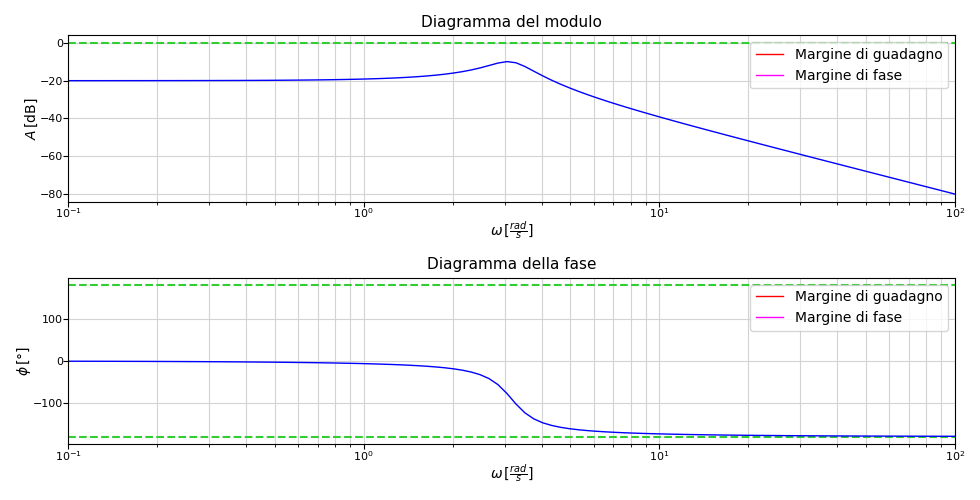

Output()

In [4]:
fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1)
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], lw=1, color='blue')
f1_line2, = f1_ax2.plot([], [], lw=1, color='blue')
f1_line3, = f1_ax1.plot([], [], lw=1, color='red')
f1_line4, = f1_ax1.plot([], [], lw=1, color='magenta')
f1_line5, = f1_ax2.plot([], [], lw=1, color='red')
f1_line6, = f1_ax2.plot([], [], lw=1, color='magenta')

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='x', tight=True)
f1_ax2.autoscale(enable=True, axis='x', tight=True)
f1_ax1.autoscale(enable=True, axis='y', tight=False)
f1_ax2.autoscale(enable=True, axis='y', tight=False)

f1_ax1.set_title('Diagramma del modulo', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Diagramma della fase', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.axhline(0, color='limegreen', ls='--')
f1_ax2.axhline(-180, color='limegreen', ls='--')
f1_ax2.axhline(180, color='limegreen', ls='--')

f1_ax1.legend([f1_line3, f1_line4], ['Margine di guadagno', 'Margine di fase'], loc='upper right')
f1_ax2.legend([f1_line5, f1_line6], ['Margine di guadagno', 'Margine di fase'], loc='upper right')

def calculate_margin(b0, b1, a0, a1, a2, b2=0, b3=0, a3=0, a4=0):
    
    W = c.tf([b3, b2, b1, b0], [a4, a3, a2, a1, a0]) # Transfer function
    
    _, _, ob = c.bode_plot(W, Plot=False)   # Small resolution plot to determine bounds   
    mag, phase, omega = c.bode_plot(W, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 100), Plot=False)   # Bode-plot 
    gm, pm, wg, wp = c.margin(W)    # Gain and phase margin
    
    global f1_line1, f1_line2, f1_line3, f1_line4, f1_line5, f1_line6
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    
    try:
        f1_ax1.lines.remove(f1_line3)
        f1_ax1.lines.remove(f1_line4)
        f1_ax2.lines.remove(f1_line5)
        f1_ax2.lines.remove(f1_line6)
    except:
        pass
    
    f1_line1, = f1_ax1.plot(omega, 20*np.log10(mag), lw=1, color='blue')
    f1_line2, = f1_ax2.plot(omega, phase*180/np.pi, lw=1, color='blue') 
    
    if wg > 0:
        f1_line3 = f1_ax1.axvline(wg, lw=1, color='red')
        f1_line5 = f1_ax2.axvline(wg, lw=1, color='red')
    else:
        f1_line3, = f1_ax1.plot([], [], lw=1, color='red')
        f1_line5, = f1_ax2.plot([], [], lw=1, color='red')
        
    if wp > 0:
        f1_line4 = f1_ax1.axvline(wp, lw=1, color='magenta')
        f1_line6 = f1_ax2.axvline(wp, lw=1, color='magenta')
    else:
        f1_line4, = f1_ax1.plot([], [], lw=1, color='magenta')
        f1_line6, = f1_ax2.plot([], [], lw=1, color='magenta') 
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()

def link_controllers(model):
    global b0i, b1i, b2i, b3i, a0i, a1i, a2i, a3i, a4i
    
    if model == 0: # 2nd order
        w.interactive_output(calculate_margin, {'b0': b0i, 'b1': b1i,
                                                'a0': a0i, 'a1': a1i, 'a2': a2i})        
    elif model == 1: # 3rd order
        w.interactive_output(calculate_margin, {'b0': b0i, 'b1': b1i, 'b2': b2i,
                                                'a0': a0i, 'a1': a1i, 'a2': a2i, 'a3': a3i})
    else : # 4th order
        w.interactive_output(calculate_margin, {'b0': b0i, 'b1': b1i, 'b2': b2i, 'b3': b3i,
                                                'a0': a0i, 'a1': a1i, 'a2': a2i, 'a3': a3i, 'a4': a4i})
        
w.interactive_output(link_controllers, {'model': typeSelect})    

<b>Il sistema in anello chiuso è stabile?</b>

In [5]:
out = w.Output()

def print_margin(b0, b1, a0, a1, a2, b2=0, b3=0, a3=0, a4=0):
    
    global out
    
    W = c.tf([b3, b2, b1, b0], [a4, a3, a2, a1, a0]) # Transfer function
    gm, pm, wg, wp = c.margin(W)    # Gain and phase margin
    
    out.clear_output()
    with out:
        print('Margine di guadagno: {:.2f} dB'.format(20*np.log10(gm)))
        print('Margine di fase: {:.2f}°'.format(pm))
        if (20*np.log10(gm) > 0):
            print('\n(stabile)')
        else:
            print('\n(instabile)')

def link_controllers2(model):
    global b0i, b1i, b2i, b3i, a0i, a1i, a2i, a3i, a4i
    
    if model == 0: # 2nd order
        w.interactive_output(print_margin, {'b0': b0i, 'b1': b1i,
                                            'a0': a0i, 'a1': a1i, 'a2': a2i})        
    elif model == 1: # 3rd order
        w.interactive_output(print_margin, {'b0': b0i, 'b1': b1i, 'b2': b2i,
                                            'a0': a0i, 'a1': a1i, 'a2': a2i, 'a3': a3i})
    else : # 4th order
        w.interactive_output(print_margin, {'b0': b0i, 'b1': b1i, 'b2': b2i, 'b3': b3i,
                                            'a0': a0i, 'a1': a1i, 'a2': a2i, 'a3': a3i, 'a4': a4i})
        
w.interactive_output(link_controllers2, {'model': typeSelect})

display(out)

Output()